In [1]:
import pandas as pd
import numpy as np
import datetime
import time

from pymongo import MongoClient
cl = MongoClient()
db = cl['flights']
col = db['raw_flights']

In [2]:
f_loc = "D:/Victor/OneDrive/Documents/Studie/Msc. Thesis/Data/20171020_20171020_0000_2359__EH___m1m3.so6"

cols = ['seg_id','org','dst','ac_type','t_seg_b','t_seg_e','fl_seg_b',
        'fl_seg_e','status','callsgn','dd_seg_b','dd_seg_e','lat_seg_b',
        'lon_seg_b','lat_seg_e','lon_seg_e','flight_id','seq','seg_len',
        'seg_par']
df = pd.read_csv(f_loc, names=cols, delim_whitespace=True)

In [1]:
len(df['callsgn'].unique())

NameError: name 'df' is not defined

In [8]:
df[['lat_seg_b','lon_seg_b','lat_seg_e','lon_seg_e']] = df[['lat_seg_b','lon_seg_b','lat_seg_e','lon_seg_e']]/60

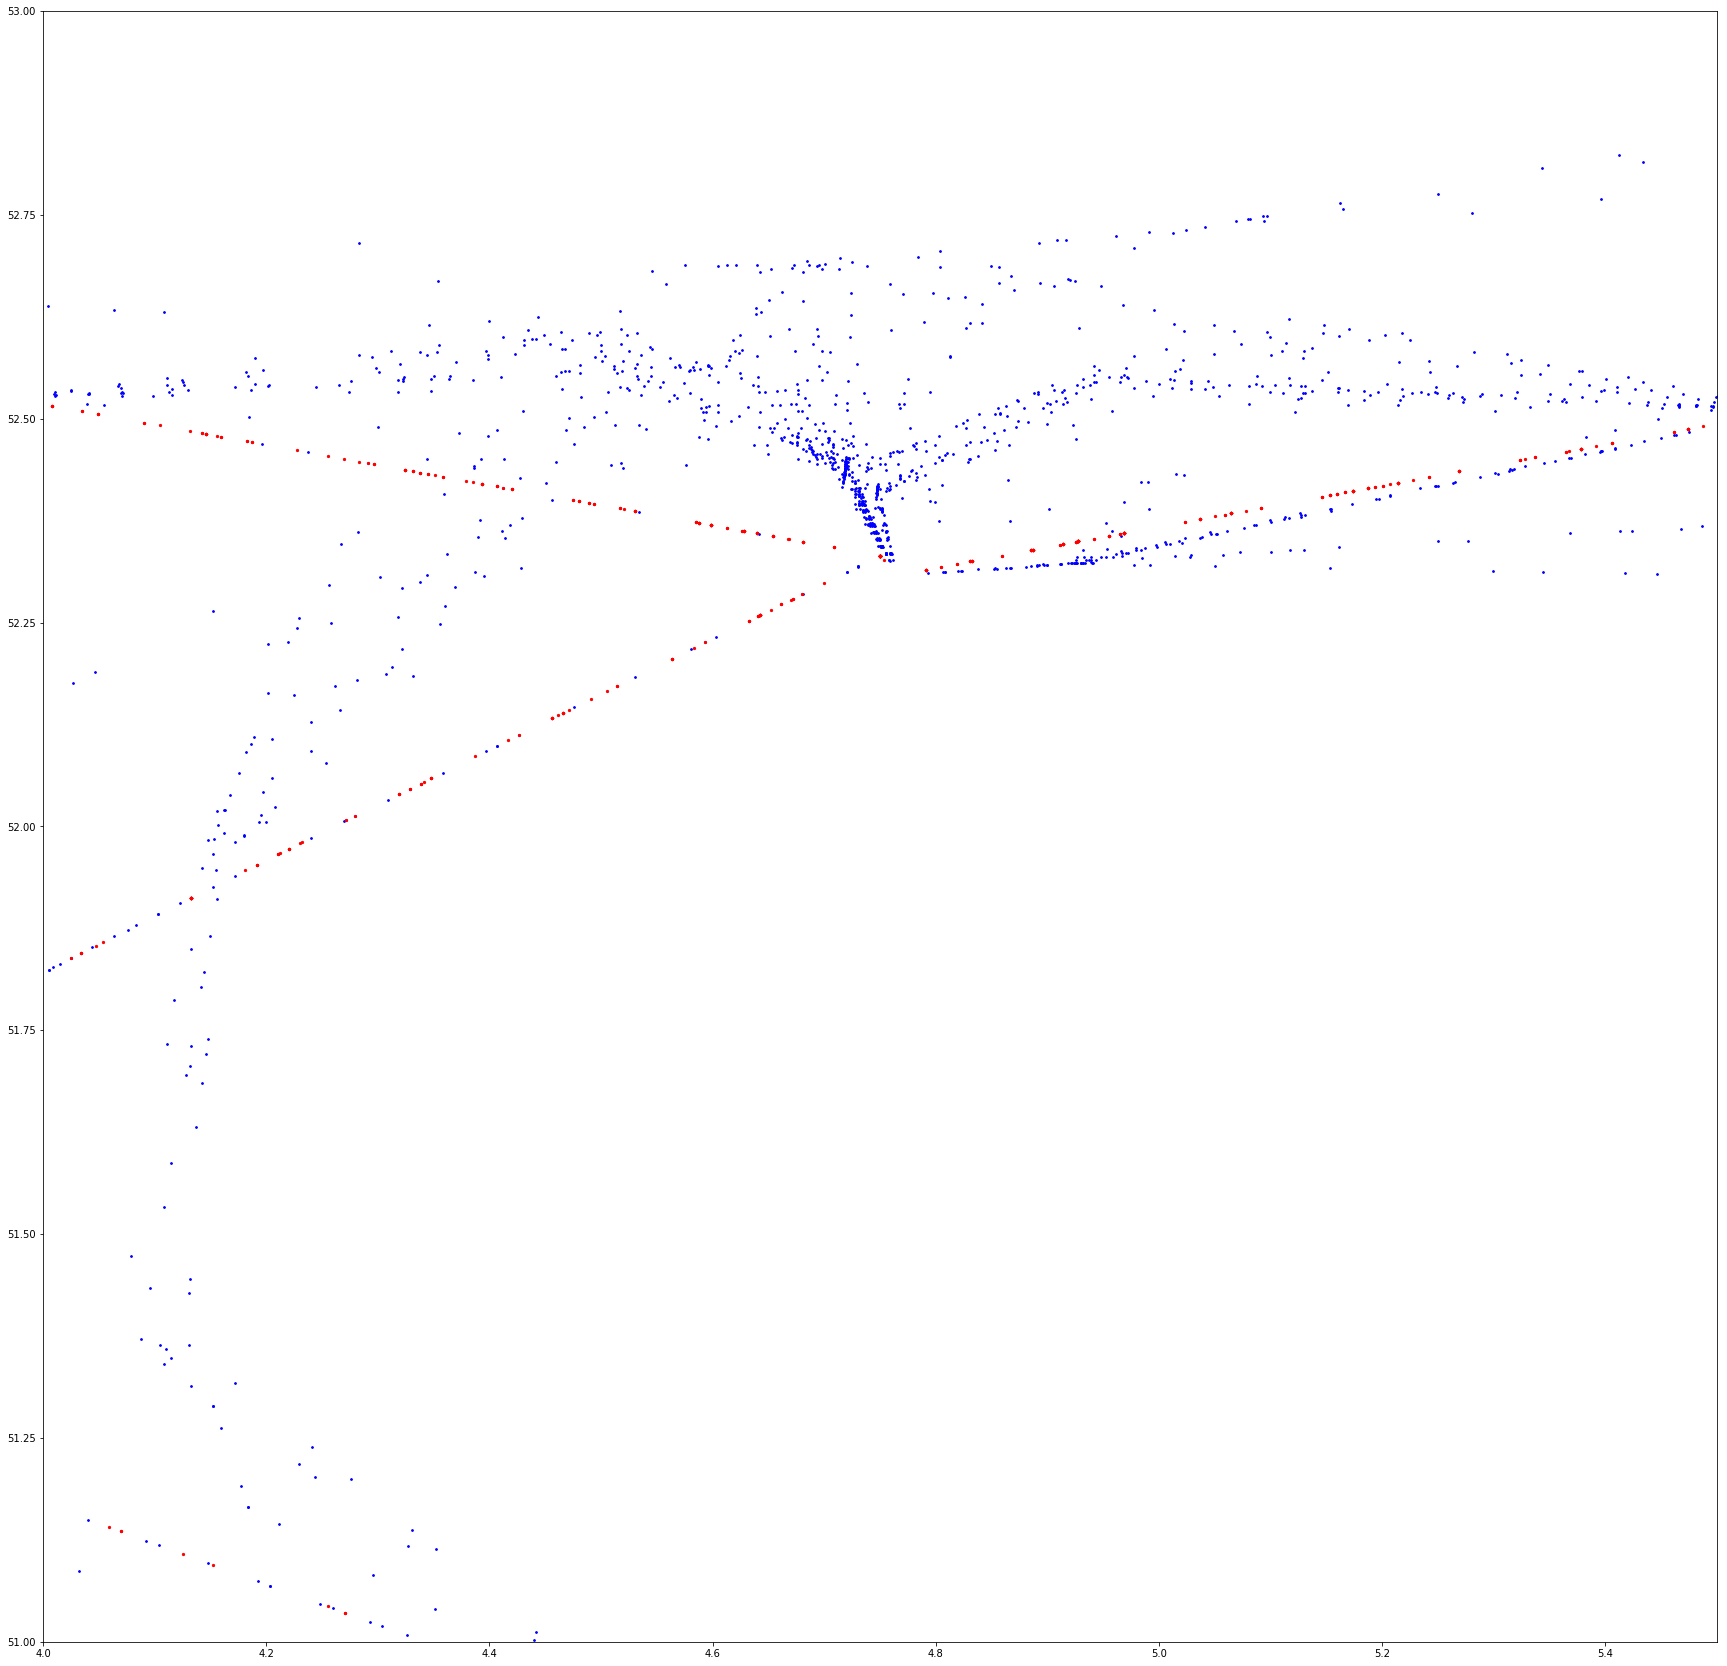

In [32]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,30))
lat_bounds = [51, 53]
lon_bounds = [4, 5.5]

for d in col.find({"data_type": "m3"})[:100]:
    g = pd.DataFrame(d)
    plt.scatter(list(g['lon_seg_b']),list(g['lat_seg_b']), c="b", s=3)
    plt.xlim(tuple(lon_bounds))
    plt.ylim(tuple(lat_bounds))
    
for d in col.find({"data_type": "m1"})[:100]:
    g = pd.DataFrame(d)
    plt.scatter(list(g['lon_seg_b']),list(g['lat_seg_b']), c="r", s=5)
    plt.xlim(tuple(lon_bounds))
    plt.ylim(tuple(lat_bounds))
    
plt.show()

In [32]:
def create_epoch_ts(r):
    try:
        dt_b = str(r['t_seg_b'])+'_'+str(r['dd_seg_b'])
        dt_e = str(r['t_seg_e'])+'_'+str(r['dd_seg_e'])

        r['ep_seg_b'] = (datetime.datetime.strptime(dt_b,'%H%M%S_%y%m%d') - datetime.datetime(1970,1,1)).total_seconds()
        r['ep_seg_e'] = (datetime.datetime.strptime(dt_e,'%H%M%S_%y%m%d') - datetime.datetime(1970,1,1)).total_seconds()
    except Exception as e:
        r['ep_seg_b'] = np.nan
        r['ep_seg_e'] = np.nan
    
    return r

In [33]:
df = df.apply(create_epoch_ts,axis=1)
df = df.drop(columns=['t_seg_b', 't_seg_e','dd_seg_b', 'dd_seg_e'])

In [17]:

df

,seg_id,org,dst,ac_type,t_seg_b,t_seg_e,fl_seg_b,fl_seg_e,status,callsgn,dd_seg_b,dd_seg_e,lat_seg_b,lon_seg_b,lat_seg_e,lon_seg_e,flight_id,seq,seg_len,seg_par
0,ESSA_$TXnh,ESSA,EHAM,B738,73600,73610,1,5,0,KLM74R,171020,171020,3579.116667,1075.116667,3578.700000,1074.966667,212252232,1,0.423505,5
1,$TXnh_*7SA5,ESSA,EHAM,B738,73610,73647,5,20,0,KLM74R,171020,171020,3578.700000,1074.966667,3577.416667,1074.500000,212252232,2,1.304836,5
2,*7SA5_$WMtj,ESSA,EHAM,B738,73647,73712,20,30,0,KLM74R,171020,171020,3577.416667,1074.500000,3576.650000,1072.700000,212252232,3,1.190208,5
3,$WMtj_*7SA7,ESSA,EHAM,B738,73712,73738,30,30,2,KLM74R,171020,171020,3576.650000,1072.700000,3575.483333,1069.983333,212252232,4,1.803013,5
4,*7SA7_*7SA6,ESSA,EHAM,B738,73738,73829,30,30,2,KLM74R,171020,171020,3575.483333,1069.983333,3574.033333,1064.366667,212252232,5,3.192284,5
5,*7SA6_$CTnW,ESSA,EHAM,B738,73829,73841,30,35,0,KLM74R,171020,171020,3574.033333,1064.366667,3574.050000,1063.300000,212252232,6,0.540551,5
6,$CTnW_$CTnY,ESSA,EHAM,B738,73841,74029,35,90,0,KLM74R,171020,171020,3574.050000,1063.300000,3574.316667,1048.300000,212252232,7,7.602016,5
7,$CTnY_!CTnZ,ESSA,EHAM,B738,74029,74111,90,110,0,KLM74R,171020,171020,3574.316667,1048.300000,3574.450000,1040.800000,212252232,8,3.800634,5
8,!CTnZ_ARS,ESSA,EHAM,B738,74111,74436,110,193,0,KLM74R,171020,171020,3574.450000,1040.800000,3575.166667,999.016667,212252232,9,21.168306,5
9,ARS_$CTnd,ESSA,EHAM,B738,74436,74525,193,210,0,KLM74R,171020,171020,3575.166667,999.016667,3576.200000,988.816667,212252232,10,5.264757,5


In [3]:
from pymongo import MongoClient
cl = MongoClient()
db = cl['flights']
col_adsb = db['raw_flights']

len(col_adsb.distinct("callsign"))

16604